<a class="anchor" id="0"></a>
# **Support Vector Machines Classifier Tutorial with Python** 

Hello friends,

Support Vector Machines (SVMs in short) are supervised machine learning algorithms that are used for classification and regression purposes. In this kernel, I build a Support Vector Machines classifier to classify a Pulsar star. I have used the **Predicting a Pulsar Star** dataset for this project. 

So, let's get started.

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Introduction to Support Vector Machines](#1)
2.	[Support Vector Machines intuition](#2)
3.	[Kernel trick](#3)
4.	[SVM Scikit-Learn libraries](#4)
5.	[Dataset description](#5)
6.	[Import libraries](#6)
7.	[Import dataset](#7)
8.	[Exploratory data analysis](#8)
9.	[Declare feature vector and target variable](#9)
10.	[Split data into separate training and test set](#10)
11.	[Feature scaling](#11)
12.	[Run SVM with default hyperparameters](#12)
13.	[Run SVM with linear kernel](#13)
14.	[Run SVM with polynomial kernel](#14)
15.	[Run SVM with sigmoid kernel](#15)
16.	[Confusion matrix](#16)
17.	[Classification metrices](#17)
18.	[ROC - AUC](#18)
19.	[Stratified k-fold Cross Validation with shuffle split](#19)
20.	[Hyperparameter optimization using GridSearch CV](#20)
21.	[Results and conclusion](#21)
22. [References](#22)


# **1. Introduction to Support Vector Machines** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


**Support Vector Machines** (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. At that time, the algorithm was in early stages. The only possibility is to draw hyperplanes for linear classifier. In 1992, Bernhard E. Boser, Isabelle M Guyon and Vladimir N Vapnik suggested a way to create non-linear classifiers by applying the kernel trick to maximum-margin hyperplanes. The current standard was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the **kernel trick**. It enable us to implicitly map the inputs into high dimensional feature spaces.

# **2. Support Vector Machines intuition** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


Now, we should be familiar with some SVM terminology. 


### Hyperplane

A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the `maximum margin hyperplane` and the linear classifier it defines is known as the `maximum margin classifier`.


### Support Vectors

Support vectors are the sample data points, which are closest to the hyperplane.  These data points will define the separating line or hyperplane better by calculating margins.


### Margin

A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.

The following diagram illustrates these concepts visually.


### Margin in SVM

![Margin in SVM](https://static.wixstatic.com/media/8f929f_7ecacdcf69d2450087cb4a898ef90837~mv2.png)


### SVM Under the hood

In SVMs, our main objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum margin hyperplane in the following 2 step process –


1.	Generate hyperplanes which segregates the classes in the best possible way. There are many hyperplanes that might classify the data. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

2.	So, we choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the **maximum margin hyperplane** and the linear classifier it defines is known as a **maximum margin classifier**. 


The following diagram illustrates the concept of **maximum margin** and **maximum margin hyperplane** in a clear manner.


### Maximum margin hyperplane

![Maximum margin hyperplane](https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg)



### Problem with dispersed datasets


Sometimes, the sample data points are so dispersed that it is not possible to separate them using a linear hyperplane. 
In such a situation, SVMs uses a `kernel trick` to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation.


### Kernel trick - transformation of input space to higher dimensional space

![Kernel trick](http://www.aionlinecourse.com/uploads/tutorials/2019/07/11_21_kernel_svm_3.png)



# **3. Kernel trick** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


In practice, SVM algorithm is implemented using a `kernel`. It uses a technique called the `kernel trick`. In simple words, a `kernel` is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

We can define a kernel function as follows-


### Kernel function

![Kernel function](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTodZptqcRor0LGo8Qn7_kJB9n9BACMt6jgIPZ4C3g_rgh_uSRZLQ&s)

In the context of SVMs, there are 4 popular kernels – `Linear kernel`,`Polynomial kernel`,`Radial Basis Function (RBF) kernel` (also called Gaussian kernel) and `Sigmoid kernel`. These are described below -

## **3.1 Linear kernel**

In linear kernel, the kernel function takes the form of a linear function as follows-

**linear kernel : K(xi , xj ) = xiT xj**

Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. Linear kernel is often used for text classification purposes.

Training with a linear kernel is usually faster, because we only need to optimize the C regularization parameter. When training with other kernels, we also need to optimize the γ parameter. So, performing a grid search will usually take more time.

Linear kernel can be visualized with the following figure.

### Linear Kernel

![Linear Kernel](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_thumb.png)

## **3.2 Polynomial Kernel**

Polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables. The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of the input samples.

For degree-d polynomials, the polynomial kernel is defined as follows –

**Polynomial kernel : K(xi , xj ) = (γxiT xj + r)d , γ > 0**

Polynomial kernel is very popular in Natural Language Processing. The most common degree is d = 2 (quadratic), since larger degrees tend to overfit on NLP problems. It can be visualized with the following diagram.

### Polynomial Kernel

![Polynomial Kernel](https://www.researchgate.net/profile/Cheng_Soon_Ong/publication/23442384/figure/fig12/AS:341444054274063@1458418014823/The-effect-of-the-degree-of-a-polynomial-kernel-The-polynomial-kernel-of-degree-1-leads.png)

## **3.3 Radial Basis Function Kernel**

Radial basis function kernel is a general purpose kernel. It is used when we have no prior knowledge about the data. The RBF kernel on two samples x and y is defined by the following equation –


### Radial Basis Function kernel

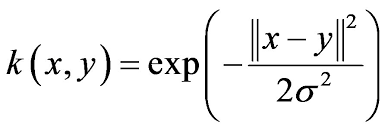

The following diagram demonstrates the SVM classification with rbf kernel.

### SVM Classification with rbf kernel

![SVM Classification with rbf kernel](https://www.researchgate.net/profile/Periklis_Gogas/publication/286180566/figure/fig5/AS:304327777374210@1449568804246/An-example-of-an-SVM-classification-using-the-RBF-kernel-The-two-classes-are-separated.png)

## **3.4 Sigmoid kernel**

Sigmoid kernel has its origin in neural networks. We can use it as the proxy for neural networks. Sigmoid kernel is given by the following equation –

**sigmoid kernel : k (x, y) = tanh(αxTy + c)**

Sigmoid kernel can be visualized with the following diagram-

### Sigmoid kernel

![Sigmoid kernel](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKeXbOIlniBXYwMYlEYLKPwZZg8vFU1wVm3RWMACjVcT4iBVDy&s)

# **4. SVM Scikit-Learn libraries** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)


Scikit-Learn provides useful libraries to implement Support Vector Machine algorithm on a dataset. There are many libraries that can help us to implement SVM smoothly. We just need to call the library with parameters that suit to our needs. In this project, I am dealing with a classification task. So, I will mention the Scikit-Learn libraries for SVM classification purposes.

First, there is a **LinearSVC()** classifier. As the name suggests, this classifier uses only linear kernel. In LinearSVC() classifier, we don’t pass the value of kernel since it is used only for linear classification purposes.

Scikit-Learn provides two other classifiers - **SVC()** and **NuSVC()** which are used for classification purposes. These classifiers are mostly similar with some difference in parameters. **NuSVC()** is similar to **SVC()** but uses a parameter to control the number of support vectors. We pass the values of kernel, gamma and C along with other parameters. By default kernel parameter uses rbf as its value but we can pass values like poly, linear, sigmoid or callable function.

# **5. Dataset description** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)


I have used the **Predicting a Pulsar Star** dataset for this project.

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Classification algorithms in particular are being adopted, which treat the data sets as binary classification problems. Here the legitimate pulsar examples form  minority positive class and spurious examples form the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).


### Attribute Information:


Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile. The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.

2. Standard deviation of the integrated profile.

3. Excess kurtosis of the integrated profile.

4. Skewness of the integrated profile.

5. Mean of the DM-SNR curve.

6. Standard deviation of the DM-SNR curve.

7. Excess kurtosis of the DM-SNR curve.

8. Skewness of the DM-SNR curve.

9. Class

# **6. Import libraries** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)


I will start off by importing the required Python libraries.

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [16]:
import warnings
warnings.filterwarnings('ignore')

# **7.Import dataset** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

In [17]:
data = './data/pulsar_stars.csv'
df = pd.read_csv(data)

# **8. Exploratory data analysis** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)


Now, I will explore the data to gain insights about the data. 

In [18]:
# view dimensions of dataset
df.shape

(17898, 9)

We can see that there are 17898 instances and 9 variables in the data set.

In [19]:
# let's preview the dataset
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


We can see that there are 9 variables in the dataset. 8 are continuous variables and 1 is discrete variable. The discrete variable is `target_class` variable. It is also the target variable.


Now, I will view the column names to check for leading and trailing spaces.

In [20]:
# view the column names of the dataframe
col_names = df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

We can see that there are leading spaces (spaces at the start of the string name) in the dataframe. So, I will remove these leading spaces.

In [21]:
# remove leading spaces from column names
df.columns = df.columns.str.strip()

I have removed the leading spaces from the column names. Let's again view the column names to confirm the same.

In [22]:
# view column names again
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

We can see that the leading spaces are removed from the column name. But the column names are very long. So, I will make them short by renaming them.

In [23]:
# rename column names
df.columns = ['IntgP_Mean', 'IntgP_Sd', 'IntgP_Kurtosis', 'IntgP_Skewness', 
              'DM_SNR_Mean', 'DM_SNR_Sd', 'DM_SNR_Kurtosis', 'DM_SNR_Skewness', 'target_class']

In [24]:
# view the renamed column names
df.columns

Index(['IntgP_Mean', 'IntgP_Sd', 'IntgP_Kurtosis', 'IntgP_Skewness',
       'DM_SNR_Mean', 'DM_SNR_Sd', 'DM_SNR_Kurtosis', 'DM_SNR_Skewness',
       'target_class'],
      dtype='object')

We can see that the column names are shortened. IntgP stands for `integrated profile` and DM_SNR stands for `delta modulation and signal to noise ratio`. Now, it is much more easy to work with the columns.

Our target variable is the `target_class` column. So, I will check its distribution.

In [25]:
# check distribution of target_class column
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [26]:
# view the percentage distribution of target_class column
df['target_class'].value_counts()/np.float(len(df))

0    0.908426
1    0.091574
Name: target_class, dtype: float64

We can see that percentage of observations of the class label `0` and `1` is 90.84% and 9.16%. So, this is a class imbalanced problem. I will deal with that in later section.

In [27]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IntgP_Mean       17898 non-null  float64
 1   IntgP_Sd         17898 non-null  float64
 2   IntgP_Kurtosis   17898 non-null  float64
 3   IntgP_Skewness   17898 non-null  float64
 4   DM_SNR_Mean      17898 non-null  float64
 5   DM_SNR_Sd        17898 non-null  float64
 6   DM_SNR_Kurtosis  17898 non-null  float64
 7   DM_SNR_Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


We can see that there are no missing values in the dataset and all the variables are numerical variables.

### **Explore missing values in variables**

In [28]:
# check for missing values in variables
df.isnull().sum()

IntgP_Mean         0
IntgP_Sd           0
IntgP_Kurtosis     0
IntgP_Skewness     0
DM_SNR_Mean        0
DM_SNR_Sd          0
DM_SNR_Kurtosis    0
DM_SNR_Skewness    0
target_class       0
dtype: int64

We can see that there are no missing values in the dataset.

### **Summary of numerical variables**


- There are 9 numerical variables in the dataset.


- 8 are continuous variables and 1 is discrete variable. 


- The discrete variable is `target_class` variable. It is also the target variable.


- There are no missing values in the dataset.

### **Outliers in numerical variables**

In [29]:
# view summary statistics in numerical variables
round(df.describe(),2)

,IntgP_Mean,IntgP_Sd,IntgP_Kurtosis,IntgP_Skewness,DM_SNR_Mean,DM_SNR_Sd,DM_SNR_Kurtosis,DM_SNR_Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


On closer inspection, we can suspect that all the continuous variables may contain outliers.


### **Check the distribution of variables and outliers**


Now, I will plot the histograms to check distributions to find out if they are normal or skewed and draw boxplots to visualise outliers in the above variables. 

In [30]:
def dist_plot(feature,feature_name):
    plt.figure(figsize=(12,5),dpi=100)
    plt.subplot(1,2,1)
    ax = sns.distplot(feature, kde=True)
    # Calculate mean and median
    mean = feature.mean()
    median = feature.median()
    # Add mean and median annotations
    ax.axvline(mean, color='red', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle='-', label='Median')
    
    plt.legend()
    plt.subplot(1,2,2)
    sns.boxplot(data=feature,showmeans=True,color='aqua')
    plt.title(feature_name)
    # Show the plot
    plt.show()

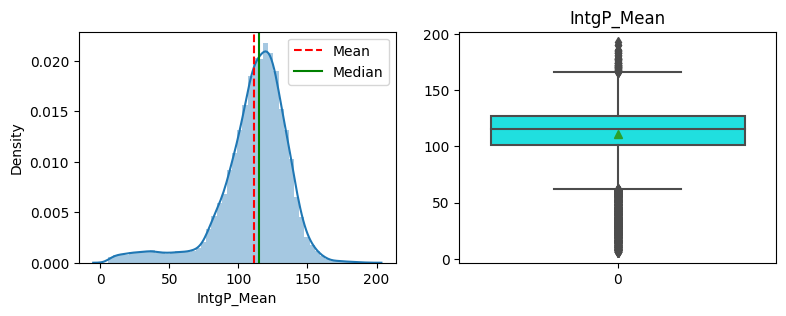

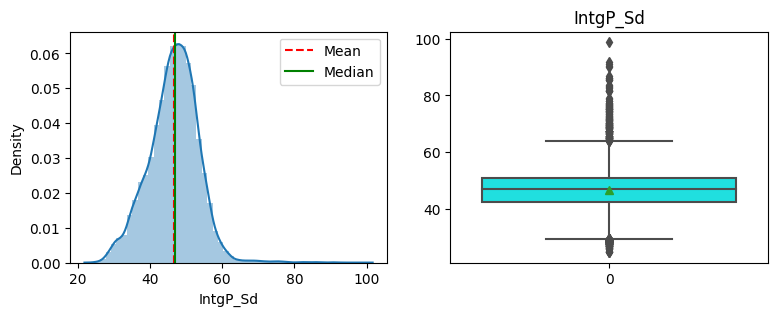

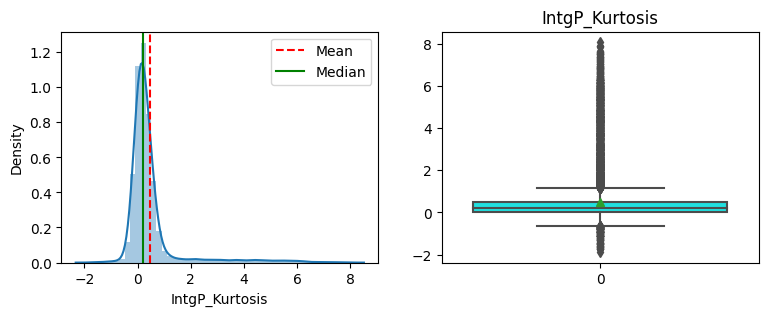

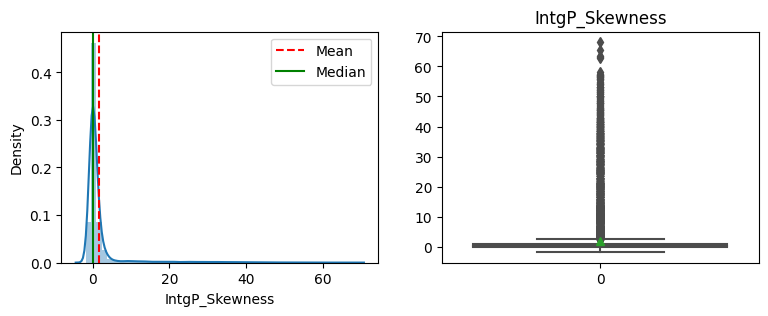

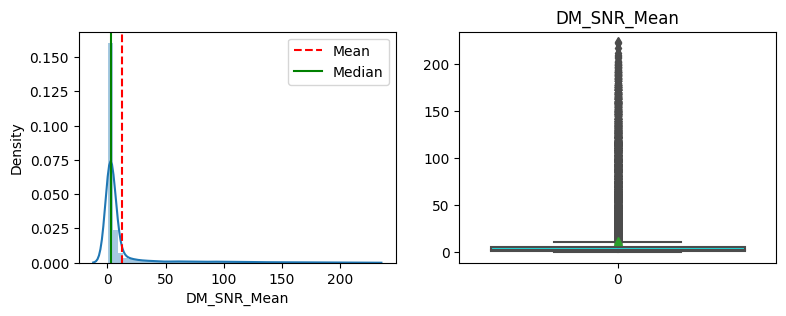

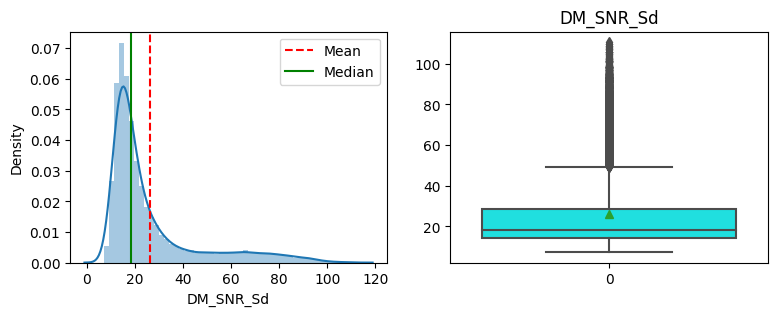

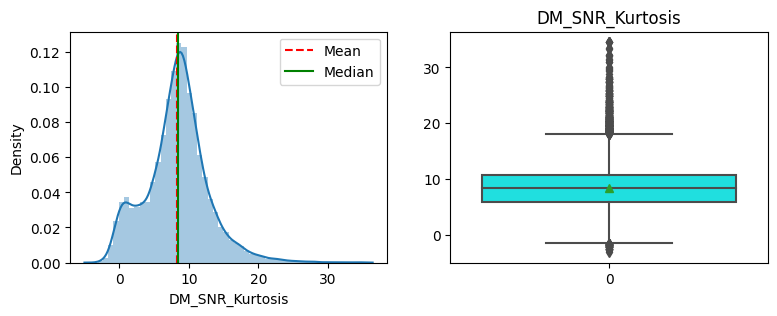

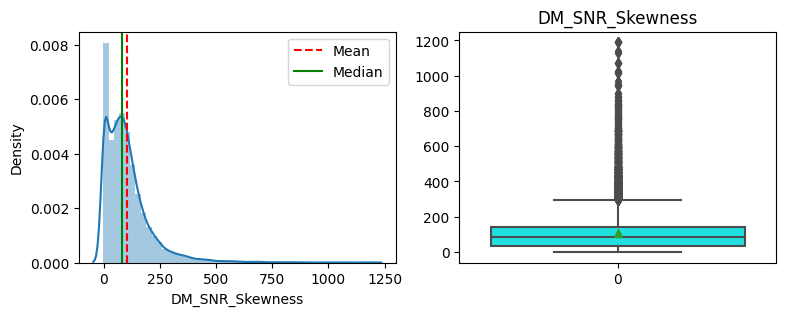

In [31]:
for col in df.columns:
    if col == "target_class":
        pass
    else:
        dist_plot(df[col],col)

The above boxplots confirm that there are lot of outliers in these variables and all the variable's distributions are skewed distributions.

## **What are the outliers?**

Outliers are data points that deviate significantly from the rest of the observations in a dataset. These data points are unusual, exceptional, or significantly different from the majority of the data. Identifying and handling outliers is crucial in statistical analysis and machine learning because they can distort the results and lead to inaccurate conclusions.

**Handle outliers**

There are 2 ways we can handle outliers. They are `Z-Score method for normal distribution` and `IQR Method for sknewed distributions`.

Along with the above methods, there are other ways to handle outliers:
1) **Data Transformation** : Transform the data using mathematical functions (e.g., log transformation) to reduce the impact of extreme values.
2) **Winsorizing** : Replace extreme values with values at the upper or lower limit within a specified range.
3) **Imputation** : Replace outliers with imputed values based on the mean, median, or other central tendency measures.
4) **Model-Based Approaches** : KNN Imputation, MissForest Imputation, NearMiss Imputation

In [32]:
# Creating backup dataframe
backup_df = df.copy()

In [33]:
def replace_outliers_with_bounds(data, feature):
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print("Upper bound for {} : {} ".format(feature, upper_bound))
    print("Lower bound for {} : {} ".format(feature, lower_bound))
    
    # Identify outliers using the IQR method
    outliers = (data < lower_bound) | (data > upper_bound)

    # Replace outliers with the minimum and maximum values within bounds
    data_no_outliers = np.clip(data, lower_bound, upper_bound)

    return data_no_outliers

In [34]:
for column in df.columns:
    if column == "target_class":
        pass
    else:
        replaced_data = replace_outliers_with_bounds(df[column].values,column)
        df[column] = replaced_data

Upper bound for IntgP_Mean : 166.3203125 
Lower bound for IntgP_Mean : 61.6953125 
Upper bound for IntgP_Sd : 63.993978603749994 
Lower bound for IntgP_Sd : 29.40524097375 
Upper bound for IntgP_Kurtosis : 1.1426657762499999 
Lower bound for IntgP_Kurtosis : -0.64224247375 
Upper bound for IntgP_Skewness : 2.6023152090000004 
Lower bound for IntgP_Skewness : -1.863103771 
Upper bound for DM_SNR_Mean : 10.776024247375 
Lower bound for DM_SNR_Mean : -3.388691471625 
Upper bound for DM_SNR_Sd : 49.4142634125 
Lower bound for DM_SNR_Sd : -6.548827487499999 
Upper bound for DM_SNR_Kurtosis : 18.085139591 
Lower bound for DM_SNR_Kurtosis : -1.6006745649999994 
Upper bound for DM_SNR_Skewness : 295.83256959375 
Lower bound for DM_SNR_Skewness : -121.56273465625 


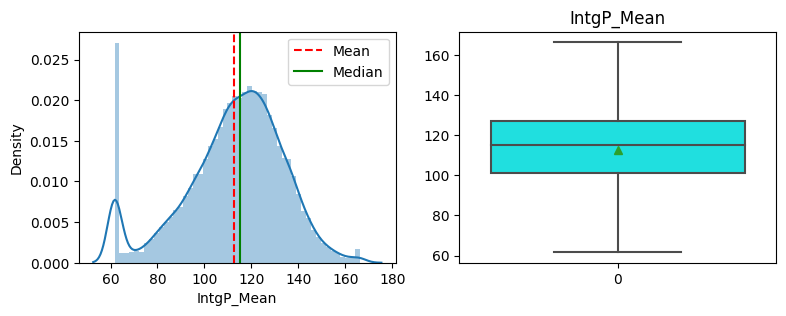

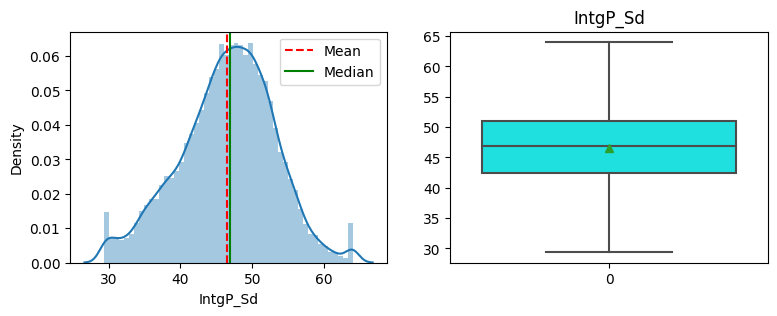

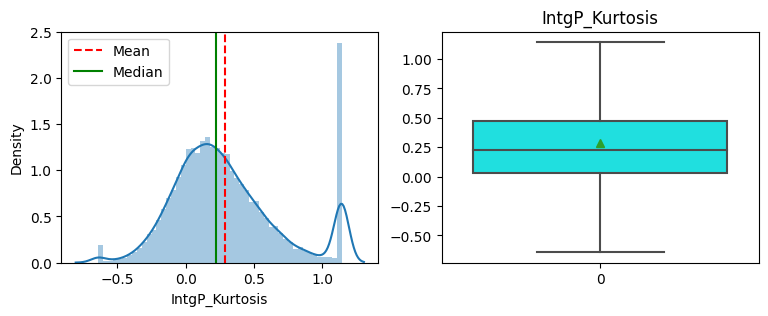

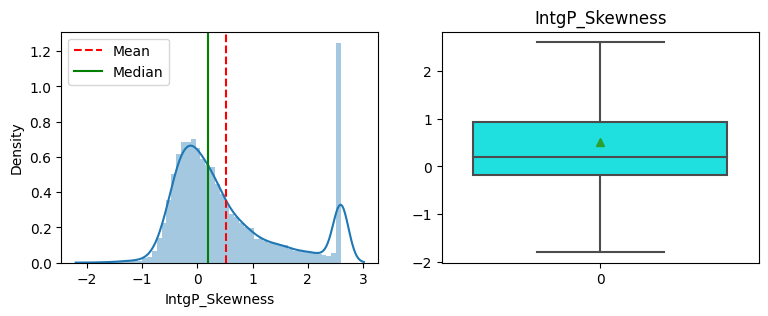

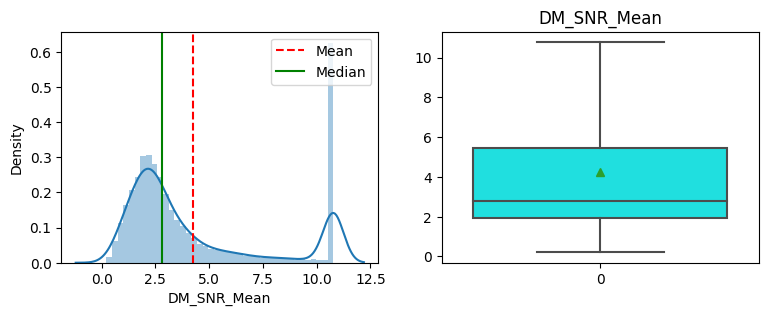

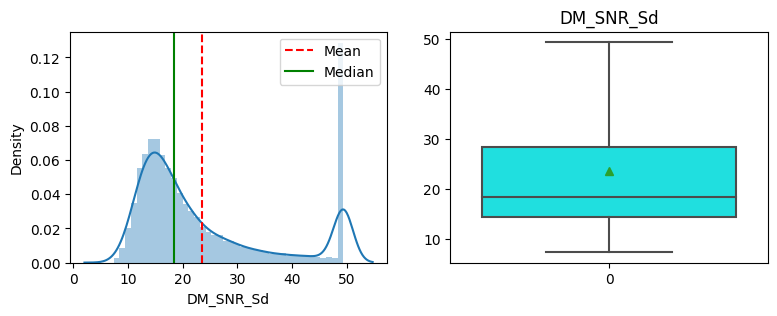

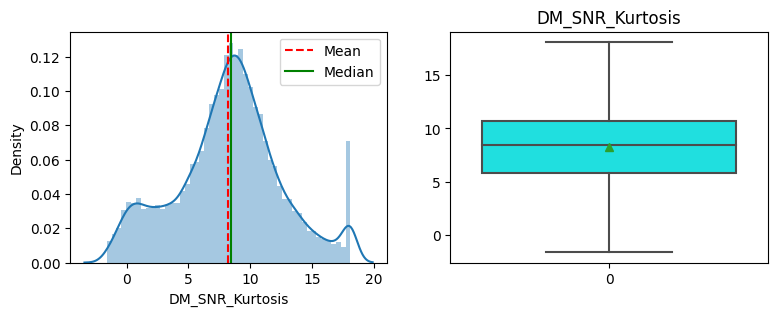

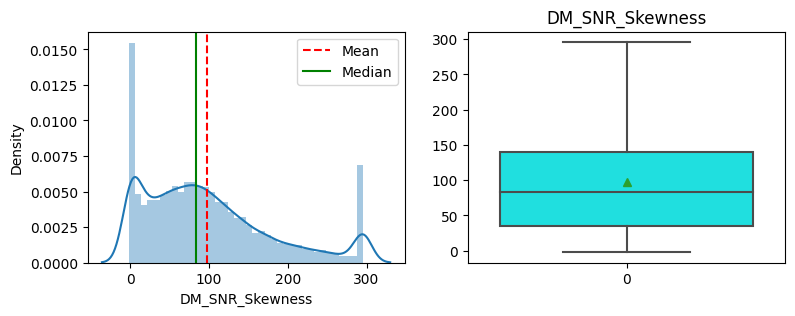

In [35]:
for col in df.columns:
    if col == "target_class":
        pass
    else:
        dist_plot(df[col],col)

* We have replaced the outliers with lower bound and Upper bound values for each variable. So, you can see that there is peak at the start and end of the distribution.

In [36]:
def comparision_dist_plot(feature,backup_feature,featurename):
    plt.figure(figsize=(12, 5), dpi=100)
    
    plt.subplot(1,2,1)
    ax = sns.distplot(feature, kde=True)
    # Calculate mean and median
    mean = feature.mean()
    median = feature.median()
    # Add mean and median annotations
    ax.axvline(mean, color='red', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle='-', label='Median')
    plt.title('Distribution Plot - No Outliers')
    plt.legend()
    plt.subplot(1,2,2)
    ax = sns.distplot(backup_feature, kde=True)
    # Calculate mean and median
    b_mean = backup_feature.mean()
    b_median = backup_feature.median()
    # Add mean and median annotations
    ax.axvline(b_mean, color='red', linestyle='--', label='Mean')
    ax.axvline(b_median, color='green', linestyle='-', label='Median')
    plt.title('Distribution Plot - With Outliers')
    plt.legend()

    # Overall title
    plt.suptitle('Comparison of Distribution Plots of {}'.format(featurename))
    plt.show()

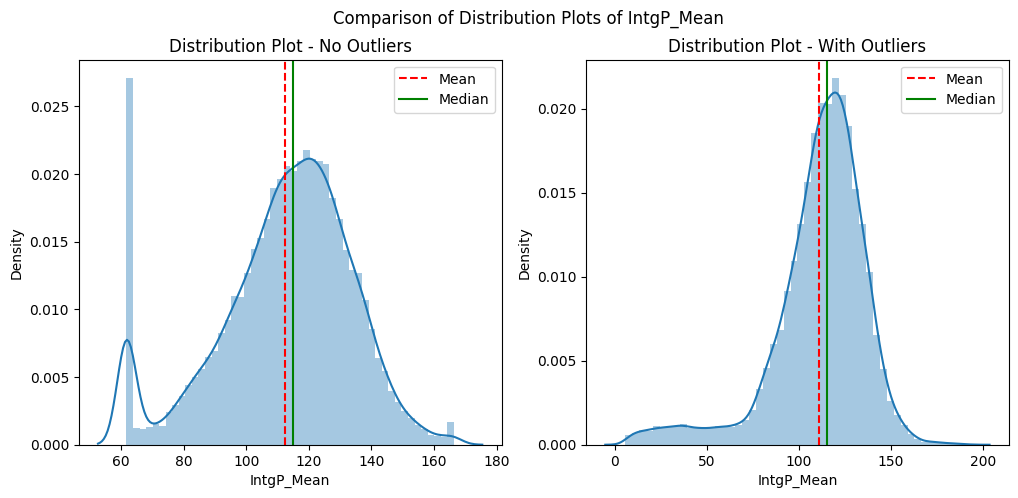

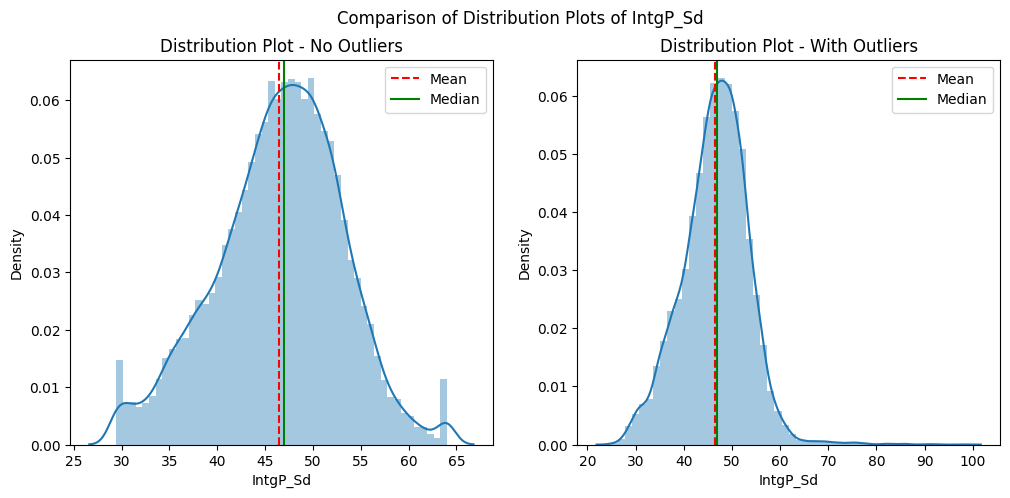

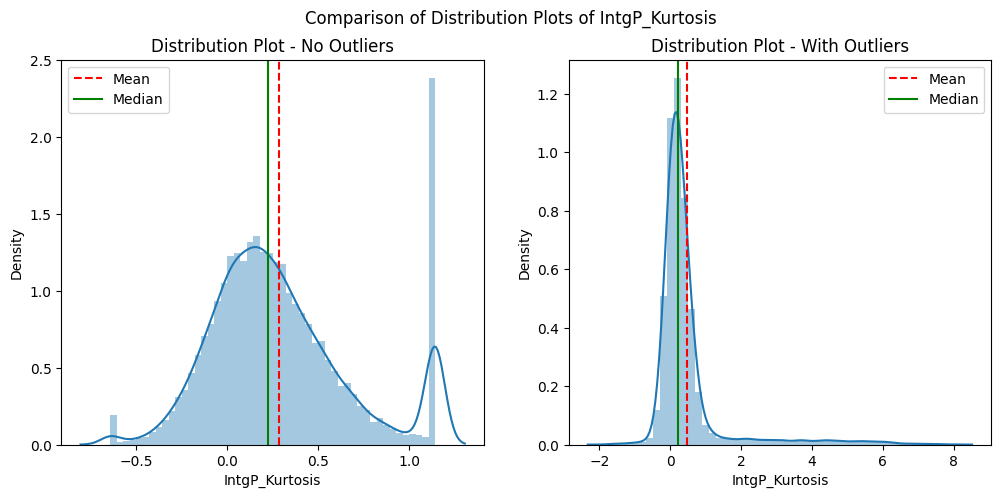

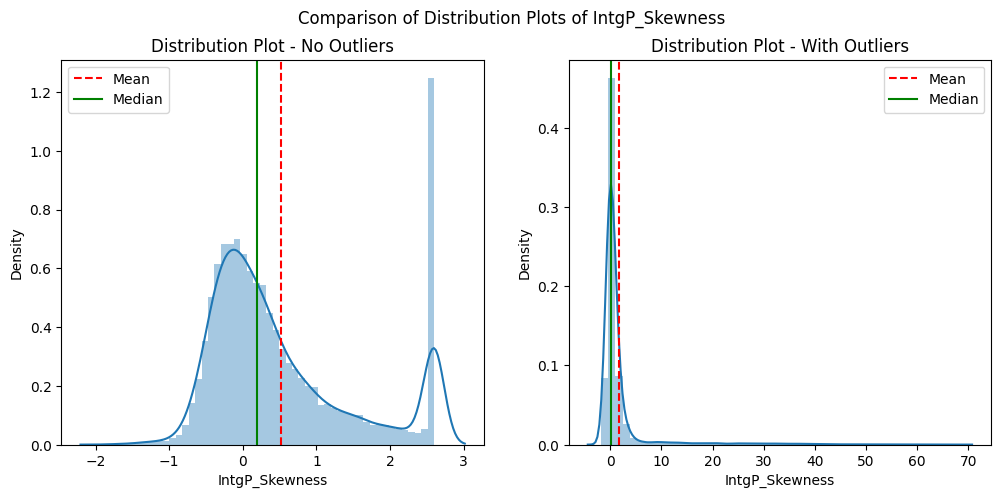

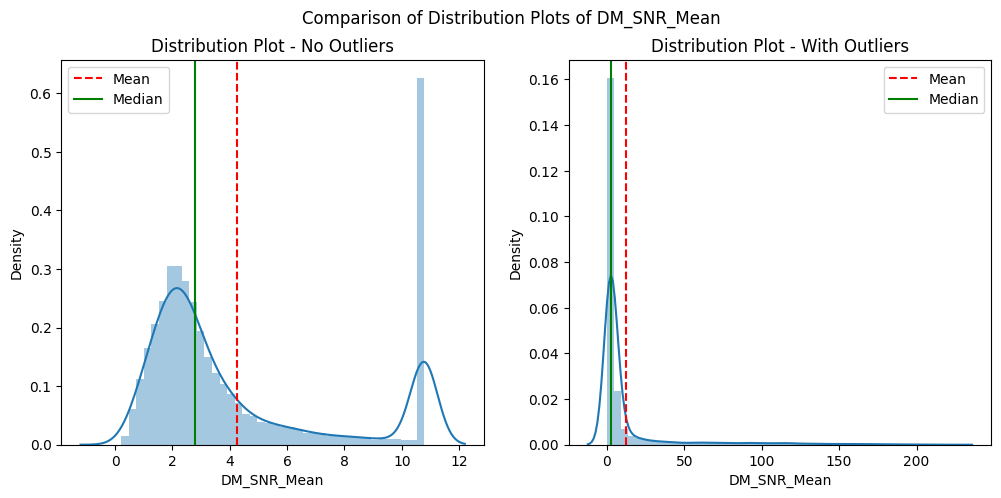

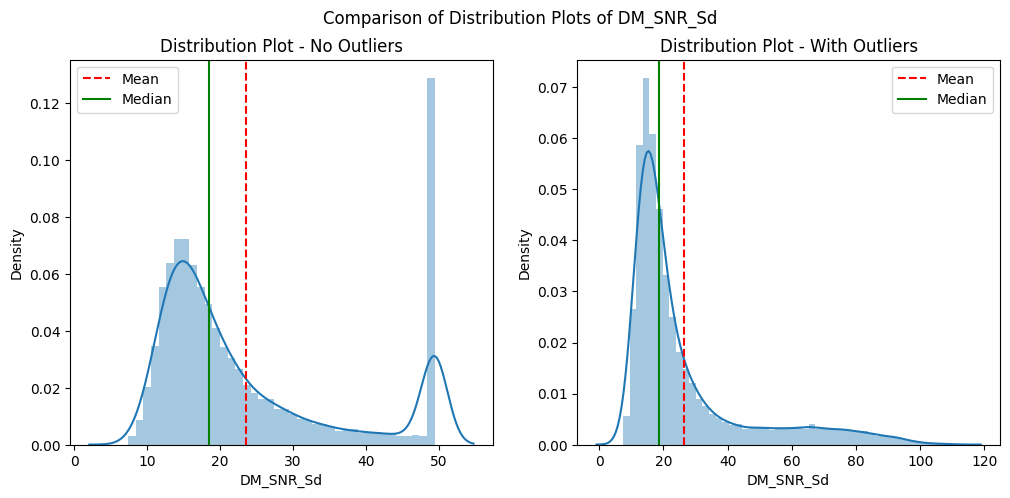

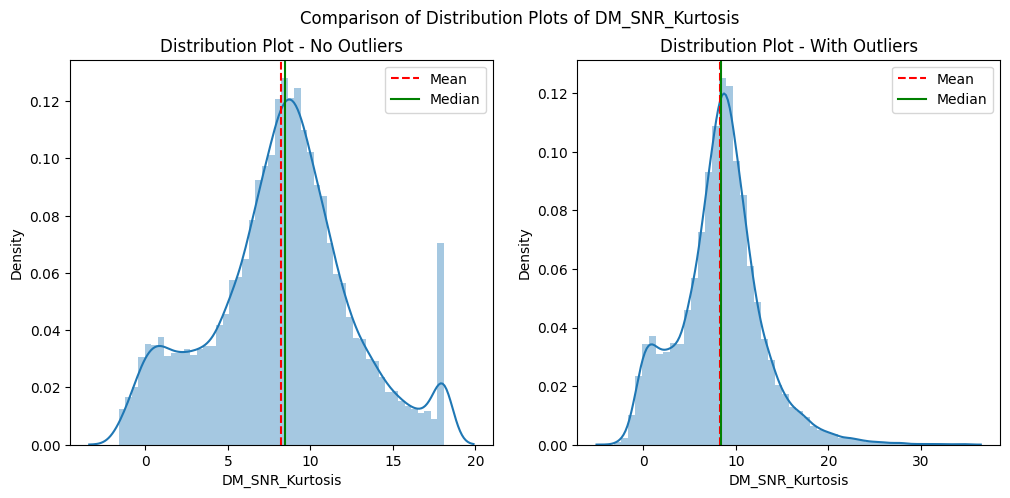

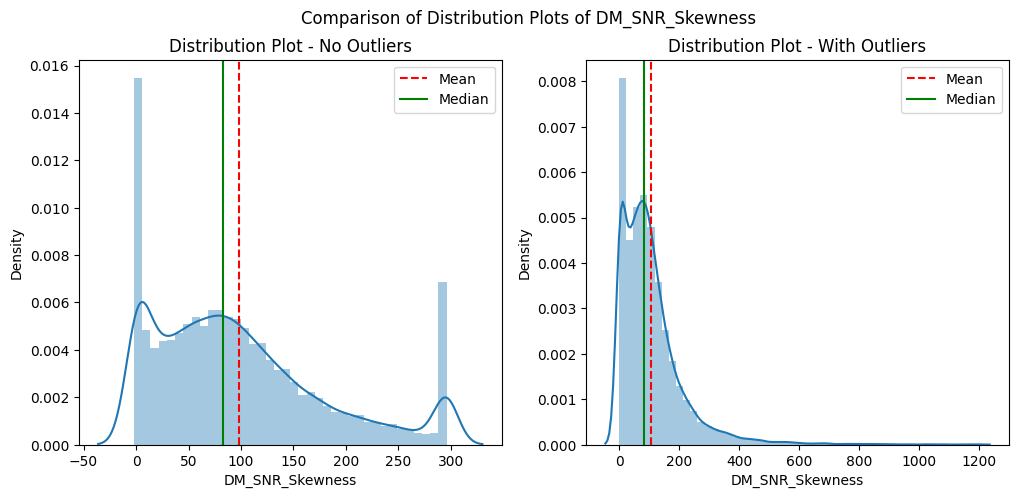

In [37]:
for col in df.columns:
    if col == "target_class":
        pass
    else:
        comparision_dist_plot(df[col],backup_df[col],col)

In [38]:
df.columns

Index(['IntgP_Mean', 'IntgP_Sd', 'IntgP_Kurtosis', 'IntgP_Skewness',
       'DM_SNR_Mean', 'DM_SNR_Sd', 'DM_SNR_Kurtosis', 'DM_SNR_Skewness',
       'target_class'],
      dtype='object')

<AxesSubplot:xlabel='target_class', ylabel='count'>

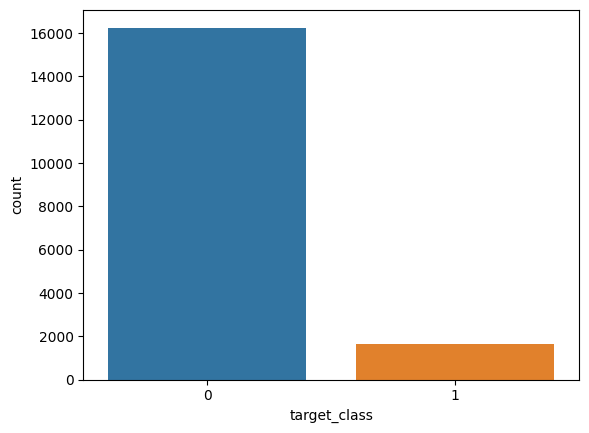

In [39]:
sns.countplot(data=df,x='target_class')

* For the discrete variable named target_class which is the target variable, there is a huge difference between the value counts. The values with the 0 are higher which are little bit above 16000 where as rows with the value 1 are less than 2000.

In [40]:
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

# **9. Declare feature vector and target variable** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

In [41]:
X = df.drop(['target_class'], axis=1)
y = df['target_class']

# **10. Split data into separate training and test set** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

In [42]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [43]:
# check the shape of X_train and X_test
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((14318, 8), (3580, 8), (14318,), (3580,))

# **11. Feature Scaling** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)

[(0, 799), (1, 1365)]


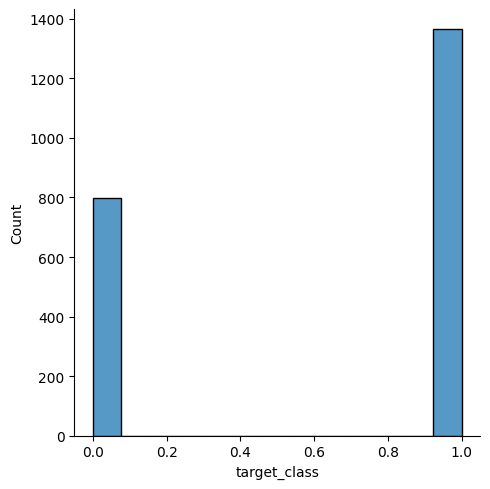

In [44]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
# performing undersampling using NearMiss
nearmiss = NearMiss(version=3)
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train1, y_train1)
print(sorted(Counter(y_train_nm).items()))
sns.displot(y_train_nm)

[(0, 1365), (1, 1365)]


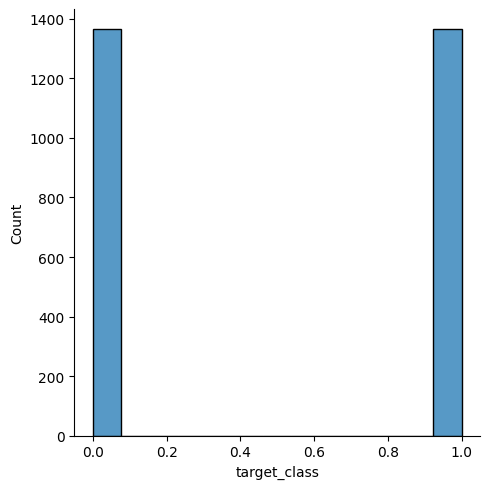

In [45]:
# performing undersampling using Random Sampling
ran = RandomUnderSampler(random_state=42)
X_train_ran, y_train_ran = ran.fit_resample(X_train1, y_train1)
print(sorted(Counter(y_train_ran).items()))
sns.displot(y_train_ran)

In [46]:
X_train, X_test, y_train, y_test = X_train1, X_test1, y_train1, y_test1

In [47]:
cols = X_train.columns

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [50]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [51]:
X_train.describe()

,IntgP_Mean,IntgP_Sd,IntgP_Kurtosis,IntgP_Skewness,DM_SNR_Mean,DM_SNR_Sd,DM_SNR_Kurtosis,DM_SNR_Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,-1.012367e-16,1.547334e-15,-7.059275e-17,1.538401e-17,4.218196e-18,1.300197e-16,-6.252855e-17,9.925167e-19
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-2.341956e+00,-2.594520e+00,-2.406971e+00,-2.348267e+00,-1.208950e+00,-1.281106e+00,-2.296314e+00,-1.232518e+00
25%,-5.353303e-01,-6.223827e-01,-6.761871e-01,-7.143279e-01,-6.977449e-01,-7.228870e-01,-5.779545e-01,-7.850710e-01
50%,1.226510e-01,6.908932e-02,-1.725896e-01,-3.244377e-01,-4.371721e-01,-4.045051e-01,5.280753e-02,-1.850025e-01
75%,6.841441e-01,6.838936e-01,4.846245e-01,4.161548e-01,3.718835e-01,3.916781e-01,5.869805e-01,5.131716e-01
max,2.497636e+00,2.651811e+00,2.202049e+00,2.120347e+00,1.930630e+00,2.035338e+00,2.320291e+00,2.456176e+00


In [52]:
y_train.describe()

count    14318.000000
mean         0.095335
std          0.293687
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target_class, dtype: float64

We now have `X_train` dataset ready to be fed into the SVM classifier. I will do it as follows.

# **12. Run SVM with default hyperparameters** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)


Default hyperparameter means C=1.0,  kernel=`rbf` and gamma=`auto` among other parameters.

In [94]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instantiate SVC with class weights for binary classification
svc = SVC()  # You can adjust the class_weight parameter as needed

# Fit classifier to training set
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc.predict(X_test)

# Compute and print accuracy score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.9818


### **Run SVM with rbf kernel and C=100.0**


We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. 
So, I will run SVM with kernel=`rbf` and C=100.0.

In [54]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9844


We can see that we obtain a higher accuracy with C=100.0 as higher C means less outliers.

Now, I will further increase the value of C=1000.0 and check accuracy.

### **Run SVM with rbf kernel and C=1000.0**


In [55]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9821


In this case, we can see that the accuracy had decreased with C=1000.0

# **13. Run SVM with linear kernel** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)


### **Run SVM with linear kernel and C=1.0**

In [56]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 
# fit classifier to training set
linear_svc.fit(X_train,y_train)
# make predictions on test set
y_pred_test=linear_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score with linear kernel and C=1.0 : 0.9824


### **Run SVM with linear kernel and C=100.0**

In [57]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 
# fit classifier to training set
linear_svc100.fit(X_train, y_train)
# make predictions on test set
y_pred=linear_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9821


### **Run SVM with linear kernel and C=1000.0**

In [58]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 
# fit classifier to training set
linear_svc1000.fit(X_train, y_train)
# make predictions on test set
y_pred=linear_svc1000.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9821


We can see that we can obtain higher accuracy with C=100.0 and C=1000.0 as compared to C=1.0.

Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

### **Compare the train-set and test-set accuracy**


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [59]:
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [60]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9765


We can see that the training set and test-set accuracy are very much comparable.

### **Check for overfitting and underfitting**

In [61]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9765
Test set score: 0.9824


The training-set accuracy score is 0.9765 while the test-set accuracy to be 0.9824. These two values are quite comparable. So, there is no question of overfitting. 


### **Compare model accuracy with null accuracy**


So, the model accuracy is 0.9824. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

In [62]:
# check class distribution in test set
y_test.value_counts()

0    3306
1     274
Name: target_class, dtype: int64

We can see that the occurences of most frequent class `0` is 3306. So, we can calculate null accuracy by dividing 3306 by total number of occurences.

In [63]:
# check null accuracy score
null_accuracy = (3306/(3306+274))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


We can see that our model accuracy score is 0.9830 but null accuracy score is 0.9235. So, we can conclude that our SVM classifier is doing a very good job in predicting the class labels.

# **14. Run SVM with polynomial kernel** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)


### **Run SVM with polynomial kernel and C=1.0**

In [64]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 
# fit classifier to training set
poly_svc.fit(X_train,y_train)
# make predictions on test set
y_pred=poly_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9824


 ### **Run SVM with polynomial kernel and C=100.0**

In [65]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 
# fit classifier to training set
poly_svc100.fit(X_train, y_train)
# make predictions on test set
y_pred=poly_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9830


Polynomial kernel gives similar performance.

# **15. Run SVM with sigmoid kernel** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)


### **Run SVM with sigmoid kernel and C=1.0**

In [66]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 
# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)
# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8480


### **Run SVM with sigmoid kernel and C=100.0**

In [67]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 
# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)
# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8469


We can see that sigmoid kernel is also performing poorly just like with polynomial kernel.

### **Comments**


We get maximum accuracy with `rbf`,`poly` and `linear` kernel with C=100.0. and the accuracy is 0.9830. Based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, this is not true. Here, we have an imbalanced dataset. The problem is that accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem.


So, we must explore alternative metrices that provide better guidance in selecting models. In particular, we would like to know the underlying distribution of values and the type of errors our classifer is making. 


One such metric to analyze the model performance in imbalanced classes problem is `Confusion matrix`.

# **16. Confusion matrix** <a class="anchor" id="16"></a>

[Table of Contents](#0.1)


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [68]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3276   30]
 [  33  241]]

True Positives(TP) =  3276

True Negatives(TN) =  241

False Positives(FP) =  30

False Negatives(FN) =  33


The confusion matrix shows `3276 + 241 = 3517 correct predictions` and `30 + 33 = 63 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 3276


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 241


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 30 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 33 `(Type II error)`

<AxesSubplot:>

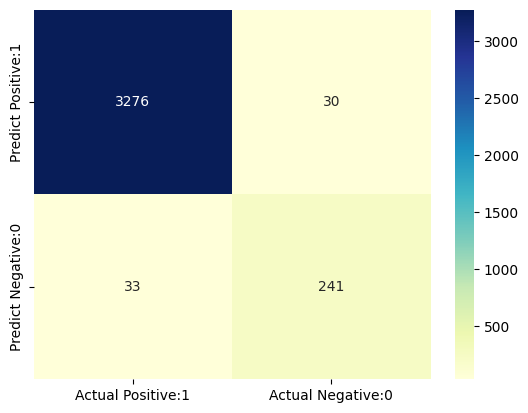

In [69]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **17. Classification metrices** <a class="anchor" id="17"></a>

[Table of Contents](#0.1)

### **Classification Report**


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model.

We can print a classification report as follows:-

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.89      0.88      0.88       274

    accuracy                           0.98      3580
   macro avg       0.94      0.94      0.94      3580
weighted avg       0.98      0.98      0.98      3580



### **Classification accuracy**

In [71]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [72]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.9824


### **Classification error**

In [73]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0176


### **Precision**


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.




In [74]:
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9909


### **Recall**


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, **recall** can be defined as the ratio of `TP to (TP + FN)`.



In [75]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9900


### **True Positive Rate**


**True Positive Rate** is synonymous with **Recall**.


In [76]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9900


### **False Positive Rate**

In [77]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1107


### **Specificity**

In [78]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8893


### **f1-score**


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.


### **Support**


**Support** is the actual number of occurrences of the class in our dataset.

# **18. ROC - AUC** <a class="anchor" id="18"></a>

[Table of Contents](#0.1)



### **ROC Curve**


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN)`.



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN)`.



In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).



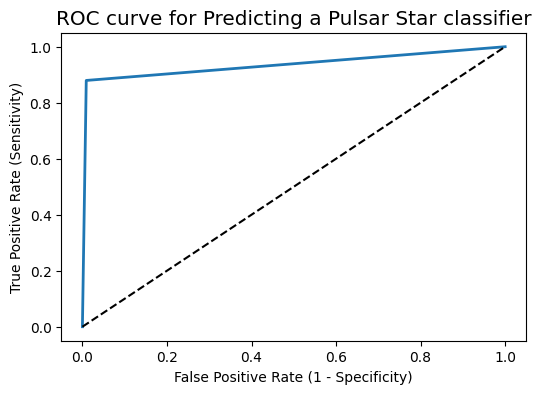

In [79]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### **ROC  AUC**


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [80]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9352


### **Comments**


- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.

In [81]:
# calculate cross-validated ROC AUC 
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9756


# **19. Stratified k-fold Cross Validation with shuffle split** <a class="anchor" id="19"></a>

[Table of Contents](#0.1)


k-fold cross-validation is a very useful technique to evaluate model performance. But, it fails here because we have a imbalnced dataset. So, in the case of imbalanced dataset, I will use another technique to evaluate model performance. It is called `stratified k-fold cross-validation`.


In `stratified k-fold cross-validation`, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.


Moreover, I will shuffle the data before splitting because shuffling yields much better result.

### **Stratified k-Fold Cross Validation with shuffle split with  linear kernel**

In [82]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
linear_svc=SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [83]:
# print cross-validation scores with linear kernel
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.98212291 0.97458101 0.97821229 0.97904443 0.97401509]


In [84]:
# print average cross-validation score with linear kernel
print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9776


### **Stratified k-Fold Cross Validation with shuffle split with rbf kernel**

In [85]:
rbf_svc=SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [86]:
# print cross-validation scores with rbf kernel
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[0.97877095 0.96871508 0.97402235 0.97233864 0.97010338]


In [87]:
# print average cross-validation score with rbf kernel
print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9728


### **Comments**


I obtain higher average stratified k-fold cross-validation score of 0.9724 with linear kernel but the model accuracy is 0.9832.
So, stratified cross-validation technique does not help to improve the model performance.

# **20. Hyperparameter Optimization using GridSearch CV** <a class="anchor" id="20"></a>

[Table of Contents](#0.1)

In [93]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
# import SVC classifier
from sklearn.svm import SVC
# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 
# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]
grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [91]:
# examine the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9783


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.3)


In [92]:
# calculate GridSearch CV score on test set
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9838


### **Comments**


- Our original model test accuracy is 0.9830 while GridSearch CV score on test-set is 0.9838.


- So, GridSearch CV helps to identify the parameters that will improve the performance for this particular model.


- Here, we should not confuse `best_score_` attribute of `grid_search` with the `score` method on the test-set. 


- The `score` method on the test-set gives the generalization performance of the model. Using the `score` method, we employ a model trained on the whole training set.


- The `best_score_` attribute gives the mean cross-validation accuracy, with cross-validation performed on the training set.

# **21. Results and conclusion** <a class="anchor" id="21"></a>

[Table of Contents](#0.1)



1. There are outliers in our dataset. So, we capped them using IQR method.

2.	We get maximum accuracy with `poly` kernel with C=100.0 and the accuracy is 0.9830. So, we can conclude that our model is doing a very good job in terms of predicting the class labels. But, this is not true. Here, we have an imbalanced dataset. Accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem. So, we must explore `confusion matrix` that provide better guidance in selecting models. 

3.	ROC AUC of our model is very close to 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.

4.	I obtain higher average stratified k-fold cross-validation score of 0.9789 with linear kernel but the model accuracy is 0.9832. So, stratified cross-validation technique does not help to improve the model performance.

5.	Our original model test accuracy is 0.9824 while GridSearch CV score on test-set is 0.9838. So, GridSearch CV helps to identify the parameters that will improve the performance for this particular model.


# **22. References** <a class="anchor" id="22"></a>

[Table of Contents](#0.1)

The work done in this project is inspired from following books and websites:-

  1. Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

  2. https://www.youtube.com/watch?v=FB5EdxAGxQg

  3. https://www.youtube.com/watch?v=ny1iZ5A8ilA&t=89s

  4. https://en.wikipedia.org/wiki/Kernel_method

  5. https://en.wikipedia.org/wiki/Support-vector_machine

  6. https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

  7. http://dataaspirant.com/2017/01/13/support-vector-machine-algorithm/

[Go to Top](#0)